In [1]:
!pip install psycopg2-binary mlxtend

In [2]:
import pandas as pd
import psycopg2
import requests

In [3]:
ANO=2022
TABLE_NAME_DEPUTADOS="deputados"
TABLE_NAME_DEPUTADOS_DESPESAS="despesas"

In [4]:
conn = psycopg2.connect(
    host="postgres",
    port="5432",  # Porta padrão do PostgreSQL
    database="postgres",
    user="root",
    password="password"
)

In [5]:
cur = conn.cursor()
sql_query = "SELECT * FROM public.despesas"
cur.execute(sql_query)
results = cur.fetchall()
cur.close()
conn.close()

In [6]:
columns = [desc[0] for desc in cur.description]
df = pd.DataFrame(results, columns=columns)

In [7]:
df

,id,ano,mes,tipo_despesa,cod_documento,tipo_documento,cod_tipo_documento,data_documento,num_documento,valor_documento,url_documento,nome_fornecedor,cnpj_cpf_fornecedor,valor_liquido,valor_glosa,num_ressarcimento,cod_lote,parcela
0,1,2022,12,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7499778,Nota Fiscal,0,2023-02-17,635,3090.00,https://www.camara.leg.br/cota-parlamentar/doc...,LIZIANE QUEVEDO,7086926000190,3090.00,0.0,,1909470,0
1,2,2022,12,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7499776,Nota Fiscal,0,2023-02-17,636,5610.00,https://www.camara.leg.br/cota-parlamentar/doc...,LIZIANE QUEVEDO,7086926000190,5610.00,0.0,,1909470,0
2,3,2022,12,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,7499669,Nota Fiscal Eletrônica,4,2023-02-15,1690,2090.00,http://www.camara.leg.br/cota-parlamentar/nota...,NOVA IMPRESSAO GRAFICA E PAPELARIA LTDA,11405562000131,2090.00,0.0,,1909407,0
3,4,2022,12,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,7497764,Nota Fiscal,0,2023-02-09,21,1500.00,https://www.camara.leg.br/cota-parlamentar/doc...,ELDORADO COMUNICACAO E JORNALISMO LTDA,37894749000130,1500.00,0.0,,1908359,0
4,5,2022,12,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,7497940,Nota Fiscal,0,2023-02-10,24,2000.00,https://www.camara.leg.br/cota-parlamentar/doc...,ALINE DA SILVA SANTOS NASCIMENTO 35683981840,42263664000193,2000.00,0.0,,1908797,0
5,6,2022,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7495573,Nota Fiscal,0,2023-02-07,380951,125.68,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS GUARIROBA / MS,4089570000150,125.68,0.0,,1907228,0
6,7,2022,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7495128,Nota Fiscal Eletrônica,4,2023-02-07,4480,6093.30,http://www.camara.leg.br/cota-parlamentar/nota...,WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME,12132854000100,6093.30,0.0,,1906953,0
7,8,2022,12,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7503963,Recibos/Outros,1,2023-03-02,14075,10760.00,https://www.camara.leg.br/cota-parlamentar/doc...,HPE AUTOMOTORES DO BRASIL LTDA,46054009000186,6168.24,0.0,,1911632,1
8,9,2022,12,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7518462,Recibos/Outros,1,2023-03-27,509,4890.00,https://www.camara.leg.br/cota-parlamentar/doc...,PRIMAVIA RENT A CAR LOCADORA DE VEICULOS LTDA ...,6027662000131,4890.00,0.0,,1919755,0
9,10,2022,12,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",7502637,Nota Fiscal,0,2023-02-28,570,50000.00,https://www.camara.leg.br/cota-parlamentar/doc...,LEANDRO ROSA ADVOGADOS ASSOCIADOS,21246199000102,50000.00,0.0,,1910891,0


In [8]:
import numpy as np

dados = df["valor_liquido"].values.tolist()

media = np.mean(dados)
mediana = np.median(dados)
desvio_padrao = np.std(dados)
minimo = np.min(dados)
maximo = np.max(dados)

print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Mínimo:", minimo)
print("Máximo:", maximo)


Média: 7559.208387096774
Mediana: 3090.0
Desvio Padrão: 11669.96425919952
Mínimo: 24.41
Máximo: 50000.0


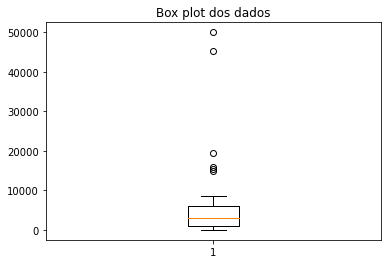

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(dados)
plt.title("Box plot dos dados")
plt.show()

In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df_cluster=df[['cod_tipo_documento', 'valor_documento']].dropna()
scaled_df = StandardScaler().fit_transform(df_cluster)

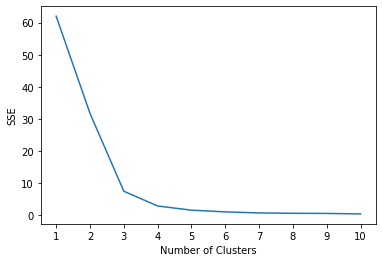

In [11]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [12]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int32)

In [13]:
df['cluster'] = kmeans.labels_
df

,id,ano,mes,tipo_despesa,cod_documento,tipo_documento,cod_tipo_documento,data_documento,num_documento,valor_documento,url_documento,nome_fornecedor,cnpj_cpf_fornecedor,valor_liquido,valor_glosa,num_ressarcimento,cod_lote,parcela,cluster
0,1,2022,12,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7499778,Nota Fiscal,0,2023-02-17,635,3090.00,https://www.camara.leg.br/cota-parlamentar/doc...,LIZIANE QUEVEDO,7086926000190,3090.00,0.0,,1909470,0,1
1,2,2022,12,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7499776,Nota Fiscal,0,2023-02-17,636,5610.00,https://www.camara.leg.br/cota-parlamentar/doc...,LIZIANE QUEVEDO,7086926000190,5610.00,0.0,,1909470,0,1
2,3,2022,12,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,7499669,Nota Fiscal Eletrônica,4,2023-02-15,1690,2090.00,http://www.camara.leg.br/cota-parlamentar/nota...,NOVA IMPRESSAO GRAFICA E PAPELARIA LTDA,11405562000131,2090.00,0.0,,1909407,0,2
3,4,2022,12,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,7497764,Nota Fiscal,0,2023-02-09,21,1500.00,https://www.camara.leg.br/cota-parlamentar/doc...,ELDORADO COMUNICACAO E JORNALISMO LTDA,37894749000130,1500.00,0.0,,1908359,0,1
4,5,2022,12,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,7497940,Nota Fiscal,0,2023-02-10,24,2000.00,https://www.camara.leg.br/cota-parlamentar/doc...,ALINE DA SILVA SANTOS NASCIMENTO 35683981840,42263664000193,2000.00,0.0,,1908797,0,1
5,6,2022,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7495573,Nota Fiscal,0,2023-02-07,380951,125.68,https://www.camara.leg.br/cota-parlamentar/doc...,AGUAS GUARIROBA / MS,4089570000150,125.68,0.0,,1907228,0,1
6,7,2022,12,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,7495128,Nota Fiscal Eletrônica,4,2023-02-07,4480,6093.30,http://www.camara.leg.br/cota-parlamentar/nota...,WMS COMERCIO DE ARTIGOS DE PAPELARIA LTDA-ME,12132854000100,6093.30,0.0,,1906953,0,2
7,8,2022,12,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7503963,Recibos/Outros,1,2023-03-02,14075,10760.00,https://www.camara.leg.br/cota-parlamentar/doc...,HPE AUTOMOTORES DO BRASIL LTDA,46054009000186,6168.24,0.0,,1911632,1,1
8,9,2022,12,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,7518462,Recibos/Outros,1,2023-03-27,509,4890.00,https://www.camara.leg.br/cota-parlamentar/doc...,PRIMAVIA RENT A CAR LOCADORA DE VEICULOS LTDA ...,6027662000131,4890.00,0.0,,1919755,0,1
9,10,2022,12,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",7502637,Nota Fiscal,0,2023-02-28,570,50000.00,https://www.camara.leg.br/cota-parlamentar/doc...,LEANDRO ROSA ADVOGADOS ASSOCIADOS,21246199000102,50000.00,0.0,,1910891,0,0
